# Exercises Week 36
## Exercise 1

## a)

> Show that the optimal parameters for Ridge regression are given by $\hat{\beta}_{\text{Ridge}} = (\mathbf{X}^T\mathbf{X} + \lambda\mathbf{I})^{-1}\mathbf{X}^T\mathbf{y}$ 

In other words, we want to minimize the cost function

$$  C(\mathbf{X},\beta) = \frac{1}{n} ||{\mathbf{y} - \mathbf{X\beta}}||_2^2 + \mathbf{\lambda}||\mathbf{\beta}||_2^2 $$

And we would like to minimize with respect to $\beta$ (while also dropping the $\frac{1}{n}$ parameter)

$$ \frac{\delta}{\delta \beta} || \mathbf{y} - \mathbf{X\beta}||_2^2 + \mathbf{\lambda}||\mathbf{\beta}||_2^2 = 0$$

To do so we first need to expand the expression for the cost function

$$ || \mathbf{y} - \mathbf{X\beta}||_2^2 + \mathbf{\lambda}||\mathbf{\beta}||_2^2 = (\mathbf{y} - \mathbf{X}\beta)^T(\mathbf{y}-\mathbf{X}\beta) + \lambda\beta^T\beta$$

We then need to find the derivate of the cost function with respect to $\beta$

$$ \frac{\delta}{\delta \beta} C(\mathbf{X}, \beta) = (\mathbf{y} - \mathbf{X}\beta)^T(\mathbf{y}-\mathbf{X}\beta) + \lambda\beta^T\beta$$

From weekly exercises 35 we proved the derivation for the first term, allowing us to easily find the full expression

$$ = -2\mathbf{X}^T(\mathbf{y}-\mathbf{X}\beta) + 2\lambda\beta $$

This expression is then set to zero and allows us to then find the solution

$$
\begin{align*}
    -2\mathbf{X}^T(\mathbf{y}-\mathbf{X}\beta) + 2\lambda\beta &= 0 \\
    -2\mathbf{X}^T\mathbf{y} + 2\mathbf{X}^T\mathbf{X}\beta + 2\lambda\beta &= 0 \\
    2\mathbf{X}^T\mathbf{X}\beta + 2\lambda\beta &= 2\mathbf{X}^T\mathbf{y} \\
    (\mathbf{X}^T\mathbf{X} + \lambda\mathbf{I})\beta &= \mathbf{X}^T\mathbf{y} \\
    \\
    \beta_{\text{Ridge}} &= (\mathbf{X}^T\mathbf{X} + \lambda\mathbf{I})^{-1}\mathbf{X}^T\mathbf{y}
\end{align*}
$$

## b)
> Show that you can write the OLS solutions in terms of the eigenvectors (the columns) of the orthogonal matrix $\mathbf{U}$
The OLS results is given as $\hat{\beta}_{\text{OLS}} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$. We substitute the SVD for $\mathbf{X}$ into the expression

$$ 
\begin{align*}
\big((\mathbf{U}\Sigma\mathbf{V}^T)^T(\mathbf{U}\Sigma\mathbf{V}^T)\big)^{-1}(\mathbf{U}\Sigma\mathbf{V}^T)^T\mathbf{y} &= \big( \mathbf{V}\Sigma^T \underbrace{\mathbf{U}^T \mathbf{U}}_{= \mathbf{I}} \Sigma\mathbf{V}^T\big)^{-1} \ \mathbf{V}\Sigma^T\mathbf{U}^T\mathbf{y} \\
&= \big( \mathbf{V}\Sigma^T \Sigma\mathbf{V}^T\big)^{-1} \ \mathbf{V}\Sigma^T\mathbf{U}^T\mathbf{y} \\ \\
\text{Since } \mathbf{V} \text{ is orthogonal and } \Sigma^T \Sigma &\text{ is an symmetric matrix we exploit that}  
\\  \big( \mathbf{V}\Sigma^T \Sigma\mathbf{V}^T\big)^{-1} &= \mathbf{V}(\Sigma^T \Sigma)^{-1}\mathbf{V}^T \\
\\
\Rightarrow\mathbf{V}(\Sigma^T \Sigma)^{-1}\mathbf{V}^T \  \mathbf{V}\Sigma^T\mathbf{U}^T\mathbf{y} &= \mathbf{V}\frac{\Sigma^T}{(\Sigma^T \Sigma)} \underbrace{\mathbf{V}^T \mathbf{V}}_{= \mathbf{I}}\mathbf{U}^T\mathbf{y} = \mathbf{V}\Sigma^{-1}\mathbf{U}^T\mathbf{y} 
\end{align*}
$$
To find the solution we just plug in $\tilde{y}_{\text{OLS}} = \mathbf{X}\hat{\beta}_{\text{OLS}}$
$$
\tilde{y}_{\text{OLS}} = \mathbf{U}\Sigma\mathbf{V}^T \  \mathbf{V}\Sigma^{-1}\mathbf{U}^T\mathbf{y} = \mathbf{U}\mathbf{U}^T\mathbf{y} = \sum_{j=0}^{p-1}\mathbf{u}_j \mathbf{u}_j^T \mathbf{y}
$$

Where $\mathbf{u}_j$ are the columns (eigenvectors) of $\mathbf{U}$

## c) 
> Show a likewise expression for Ridge Regression
The methods is similar as for OLS, but we instead insert $\mathbf{X} = \mathbf{U}\Sigma\mathbf{V}^T$ into the expression we proved in the first task

$$
\begin{align*}
\hat{\beta}_{\text{Ridge}} = (\mathbf{X}^T\mathbf{X} + \lambda\mathbf{I})^{-1}\mathbf{X}^T\mathbf{y} &= \big((\mathbf{U}\Sigma\mathbf{V}^T)^T(\mathbf{U}\Sigma\mathbf{V}^T) + \lambda\textbf{I}\big)^{-1}(\mathbf{U}\Sigma\mathbf{V}^T)^T\mathbf{y} \\
&= \big( \mathbf{V}\Sigma^T \Sigma\mathbf{V}^T  + \lambda\textbf{I}\big)^{-1} \ (\mathbf{U}\Sigma\mathbf{V}^T)^T\mathbf{y} \\
 \text{From here we will assign the diagonal matrix } \Sigma^T \Sigma \text{ as } \Sigma^2 \\
\hat{\beta}_{\text{Ridge}} &=\big( \mathbf{V}\Sigma^2\mathbf{V}^T  + \lambda\textbf{I}\big)^{-1} \ (\mathbf{U}\Sigma\mathbf{V}^T)^T\mathbf{y} 
\end{align*}
$$
We then plug this into equation for the solution

$$
\begin{align*}
    \tilde{y}_{\text{Ridge}} = \mathbf{X}\hat{\beta}_{\text{Ridge}} &= \mathbf{U}\Sigma\mathbf{V}^T \ \big( \mathbf{V}\Sigma^2\mathbf{V}^T  + \lambda\textbf{I}\big)^{-1} \ (\mathbf{U}\Sigma\mathbf{V}^T)^T\mathbf{y} \\
    \text{Where we again exploit the orthogonality of } \mathbf{V} \\
    &= \mathbf{U}\Sigma\mathbf{V}^T \ \mathbf{V}\big(\Sigma^2  + \lambda\textbf{I}\big)^{-1}\mathbf{V}^T \ (\mathbf{U}\Sigma\mathbf{V}^T)^T\mathbf{y} \\
    &= \mathbf{U}\Sigma\underbrace{\mathbf{V}^T    \mathbf{V}}_{=\mathbf{I}}\big(\Sigma^2  + \lambda\textbf{I}\big)^{-1} \underbrace{\mathbf{V}^T    \mathbf{V}}_{=\mathbf{I}}  \Sigma^T\mathbf{U}^T\mathbf{y} \\
    &= \mathbf{U}\Sigma\big(\Sigma^2  + \lambda\textbf{I}\big)^{-1} \Sigma^T\mathbf{U}^T\mathbf{y} \
\end{align*}
$$




The term $\Sigma\big(\Sigma^2  + \lambda\textbf{I}\big)^{-1} \Sigma^T$ can be broken down elementwise diagonally:

$$
\begin{align*}
    \text{The } \textit{j-th} \text{ diagonal element of } \Sigma\Sigma^T&: \sigma^2_j \\
  \text{The } \textit{j-th} \text{ diagonal element of } \big(\Sigma^2  + \lambda\textbf{I}\big)^{-1}&: \frac{1}{\sigma^2_j + \lambda}
\end{align*}
$$
Which plugged back into the expression
$$
= \mathbf{U}\frac{\sigma^2j}{\sigma^2_j + \lambda}\mathbf{U}^T\mathbf{y} = \mathbf{U}\mathbf{U}^T \frac{\sigma^2j}{\sigma^2_j + \lambda}\mathbf{y} = \sum_{j=0}^{p-1}\mathbf{u}_j \mathbf{u}_j^T \frac{\sigma^2j}{\sigma^2_j + \lambda} \mathbf{y} 
$$

## Exercise 2

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
def design_matrix(x, degree):
    X = np.zeros((len(x), degree + 1))
    for i in range(degree + 1):
        X[:,i] = x.flatten()**i
    return X

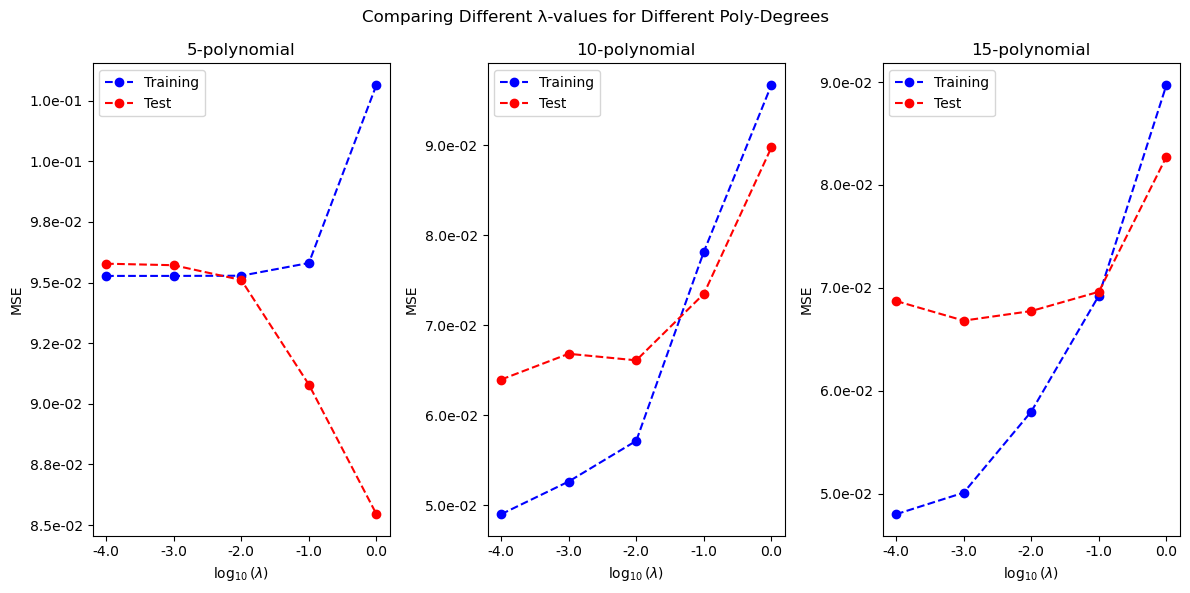

In [3]:
seed = 29
np.random.seed(seed)
n = 100
# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1, x.shape)

lambdas   = np.logspace(-4, 0, 5)
degrees   = [5, 10, 15]
MSE_train = {deg : [] for deg in degrees}
MSE_test  = {deg : [] for deg in degrees}

plt.figure(figsize=(12, 6))

for idx, deg in enumerate(degrees):
    # Creating Design matrix and splitting data 
    X  = design_matrix(x, deg)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    
    # Scaling
    scaler_X = StandardScaler().fit(X_train)
    scaler_y = StandardScaler().fit(y_train)
    
    X_train_scaled = scaler_X.transform(X_train) 
    X_test_scaled = scaler_X.transform(X_test)

    y_train_scaled = scaler_y.transform(y_train)
    y_test_scaled = scaler_y.transform(y_test)
    
    I = np.eye(deg+1)
    # Varying the λ-parameter
    for λ in lambdas:
        β = np.linalg.inv(X_train_scaled.T @ X_train_scaled + λ*I) @ X_train_scaled.T @ y_train_scaled

        y_tilde = X_train_scaled @ β
        y_tilde = X_train_scaled @ β
        y_pred = X_test_scaled @ β

        MSE_train[deg].append(mean_squared_error(y_train_scaled, y_tilde))
        MSE_test[deg].append(mean_squared_error(y_test_scaled, y_pred)) 

    p = plt.subplot(1, 3, idx+1)
    p.yaxis.set_major_formatter(plt.FormatStrFormatter("%.1e"))
    
    plt.plot(np.log10(lambdas), MSE_train[deg], 'b--o', label='Training')
    plt.plot(np.log10(lambdas), MSE_test[deg], 'r--o', label='Test')
    
    plt.xlabel("$\log_{10}(λ)$")
    plt.ylabel("MSE")
    plt.title(f'{deg}-polynomial')
    plt.legend()
    plt.xticks([np.log10(λ) for λ in lambdas], [str(np.log10(λ)) for λ in lambdas])
    
plt.suptitle("Comparing Different λ-values for Different Poly-Degrees")
plt.tight_layout()
plt.show()

### Conclusions
- I have a hard time interpreting the results. 
- Only for the higher polynomial degrees, do we see a clear benefit of smaller $λ$-values. 
- For the lower polynomial degree, the error diverges for larger $λ$-values, for the test and training data.  